In [2]:
import cv2
import numpy as np
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# initialize HOG descriptor with (mostly) default supported parameters
width, height = 128, 64
descriptor = cv2.HOGDescriptor(_winSize = (width,height),
                               _blockSize = (16,16),
                               _blockStride = (8,8),
                               _cellSize = (8,8),
                               _nbins = 9)

In [4]:
# read image from URL and compute HOG features
def extract_features(image_url, descriptor=descriptor):
    image = io.imread(image_url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    print('Original image:')
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    print('Resized image:')
    image = cv2.resize(image, (width,height))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    hog = descriptor.compute(image)
    hog = hog.flatten()
    return hog

Original image:


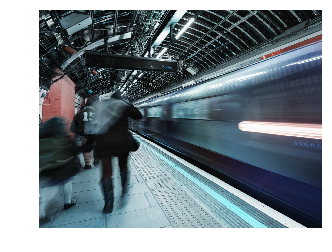

Resized image:


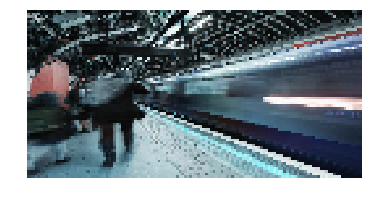

HOG vector:
[0.07069091 0.07552709 0.15499128 ... 0.19493683 0.12356531 0.0914105 ]


In [5]:
image_url = 'https://oxfordportal.blob.core.windows.net/vision/Analysis/3.jpg'
features = extract_features(image_url)

print('HOG vector:')
print(features)

In [6]:
from pandas import DataFrame
from IPython.display import display

df = DataFrame(data=np.reshape(features, (1,len(features))))
display(df)

,0,1,2,3,4,5,6,7,8,9,...,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779
0,0.070691,0.075527,0.154991,0.106102,0.218067,0.218067,0.218067,0.216026,0.192011,0.059129,...,0.018814,0.065769,0.004625,0.089652,0.194971,0.336087,0.197564,0.194937,0.123565,0.09141
